In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Pokemon.csv')

df



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
nan_count = df.isna().sum()
print(nan_count )

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [4]:
df = df.loc[df['Name'].str.len() <= 12]

In [5]:
df = df.rename(columns={"Type 1": "Type"})
df

,#,Name,Type,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


In [6]:
type = {'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Electric': 4, 'Ice': 5, 'Fighting': 6, 'Poison': 7, 'Ground': 8, 'Flying': 9, 'Psychic': 10, 'Bug': 11, 'Rock': 12, 'Ghost': 13, 'Dark': 14, 'Dragon': 15, 'Steel': 16, 'Fairy': 18, }

df.Type = [type[item] for item in df.Type]


In [7]:
df.drop(columns = ['Type 2','Name'], axis=1, inplace=True)


,#,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,3,318,45,49,49,65,65,45,1,False
1,2,3,405,60,62,63,80,80,60,1,False
2,3,3,525,80,82,83,100,100,80,1,False
4,4,1,309,39,52,43,60,50,65,1,False
5,5,1,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
791,715,9,535,85,70,80,97,80,123,6,False
792,716,18,680,126,131,95,131,98,99,6,True
793,717,14,680,126,131,95,131,98,99,6,True
795,719,12,600,50,100,150,100,150,50,6,True


In [8]:

shuffle = df
shuffle = df.sample(frac = 1)

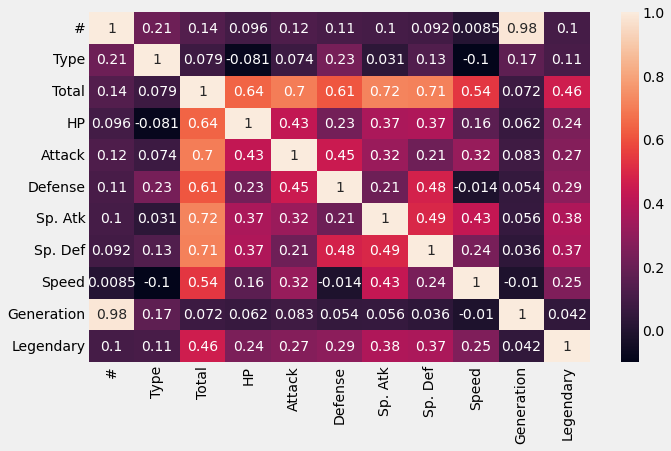

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#Main split

###############

from sklearn.model_selection import train_test_split

x = df.drop("Type",axis=1)
y = df["Type"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


###############


#2nd split
def testTrainSplit(df):
  length = len(df.index)
  splitLimit = int(length * 0.7)
  train = df[0: splitLimit]
  test = df[splitLimit + 1: length]
  return train, test


train,test = testTrainSplit(shuffle)

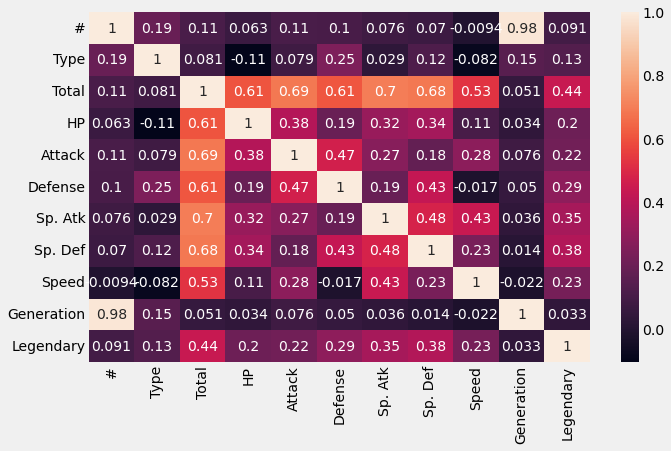

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)
plt.show()

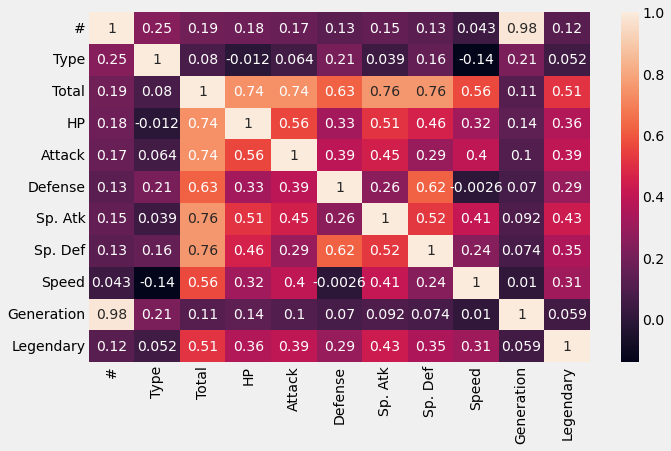

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(test.corr(),annot=True)
plt.show()

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

regr.fit(x_train,y_train)

print(regr.score(x_train,y_train))

0.16063678675226412


In [79]:
prediction = regr.predict(x_test)

In [84]:
mean_squared_error(y_test,prediction)

# Freaking bad dood


27.794383746438317

In [58]:
from sklearn.model_selection import train_test_split

x = df.drop("Type",axis=1)
y = df["Type"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)

print(knn.score(x_test,y_test))

0.11267605633802817


In [60]:
predicted = knn.predict(x_test)


In [61]:
y_test = np.array(y_test)
for x in range(len(predicted)):
    print("Predicted ", predicted[x],"Actual: ", y_test[x])

Predicted  14 Actual:  15
Predicted  0 Actual:  0
Predicted  0 Actual:  0
Predicted  2 Actual:  3
Predicted  2 Actual:  3
Predicted  0 Actual:  16
Predicted  2 Actual:  1
Predicted  18 Actual:  12
Predicted  0 Actual:  5
Predicted  2 Actual:  0
Predicted  2 Actual:  4
Predicted  0 Actual:  7
Predicted  11 Actual:  2
Predicted  0 Actual:  7
Predicted  2 Actual:  8
Predicted  7 Actual:  6
Predicted  1 Actual:  15
Predicted  2 Actual:  8
Predicted  11 Actual:  4
Predicted  10 Actual:  1
Predicted  6 Actual:  0
Predicted  2 Actual:  1
Predicted  0 Actual:  2
Predicted  2 Actual:  12
Predicted  2 Actual:  1
Predicted  2 Actual:  0
Predicted  11 Actual:  3
Predicted  2 Actual:  13
Predicted  2 Actual:  4
Predicted  7 Actual:  11
Predicted  1 Actual:  2
Predicted  0 Actual:  2
Predicted  14 Actual:  5
Predicted  0 Actual:  10
Predicted  0 Actual:  6
Predicted  10 Actual:  4
Predicted  12 Actual:  15
Predicted  1 Actual:  12
Predicted  2 Actual:  3
Predicted  11 Actual:  0
Predicted  2 Actual:

In [66]:
y_test

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
672,611,410,66,117,70,40,50,67,5,False
475,428,480,65,76,84,54,96,105,4,False
367,335,458,73,115,60,60,60,90,3,False
510,460,494,90,92,75,92,85,60,4,False
203,188,340,55,45,50,45,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...
129,120,340,30,45,55,70,55,85,1,False
90,83,352,52,65,55,58,62,60,1,False
682,621,485,77,120,90,60,90,48,5,False
341,312,405,60,40,50,75,85,95,3,False


In [67]:
y_test

array([15,  0,  0,  3,  3, 16,  1, 12,  5,  0,  4,  7,  2,  7,  8,  6, 15,
        8,  4,  1,  0,  1,  2, 12,  1,  0,  3, 13,  4, 11,  2,  2,  5, 10,
        6,  4, 15, 12,  3,  0, 15, 13,  0, 14,  5, 14,  8,  5, 11,  2,  2,
       18,  2,  3, 15,  4,  6,  2,  2,  1,  2,  2, 16,  4, 18, 16, 13,  3,
        6,  7,  0, 10,  0, 14,  8,  3,  7, 14, 12,  3,  2,  6,  2,  3, 11,
       16, 16, 18,  3, 10,  0,  1, 15,  2,  6, 11, 11, 14,  3,  0, 13,  4,
        4, 12, 16,  8, 11,  2, 10,  5,  3,  0, 10,  0,  2, 14,  0, 14,  7,
       15,  3,  1,  2,  1,  6,  3, 12, 11,  2,  0,  0, 18, 12,  7,  9, 11,
       16,  2,  0, 15,  4,  2], dtype=int64)

In [73]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(x_train, y_train)

MultinomialNB()

In [74]:
predicted = gnb.predict(x_test)

In [75]:
for x in range(len(predicted)):
    print("Predicted ", predicted[x],"Actual: ", y_test[x])

Predicted  14 Actual:  15
Predicted  11 Actual:  0
Predicted  0 Actual:  0
Predicted  5 Actual:  3
Predicted  7 Actual:  3
Predicted  12 Actual:  16
Predicted  7 Actual:  1
Predicted  9 Actual:  12
Predicted  5 Actual:  5
Predicted  18 Actual:  0
Predicted  7 Actual:  4
Predicted  0 Actual:  7
Predicted  16 Actual:  2
Predicted  7 Actual:  7
Predicted  2 Actual:  8
Predicted  7 Actual:  6
Predicted  18 Actual:  15
Predicted  7 Actual:  8
Predicted  18 Actual:  4
Predicted  10 Actual:  1
Predicted  8 Actual:  0
Predicted  4 Actual:  1
Predicted  7 Actual:  2
Predicted  13 Actual:  12
Predicted  12 Actual:  1
Predicted  7 Actual:  0
Predicted  7 Actual:  3
Predicted  1 Actual:  13
Predicted  7 Actual:  4
Predicted  7 Actual:  11
Predicted  7 Actual:  2
Predicted  7 Actual:  2
Predicted  18 Actual:  5
Predicted  7 Actual:  10
Predicted  7 Actual:  6
Predicted  15 Actual:  4
Predicted  15 Actual:  15
Predicted  18 Actual:  12
Predicted  18 Actual:  3
Predicted  7 Actual:  0
Predicted  2 Ac

In [76]:

#.score uses the r-squared metric
print(gnb.score(x_test,y_test))

0.09859154929577464
